# Multi-sites

author: steeve.laquitaine@epfl.ch  
date: 2023.10.13  
last modified: 2023.10.13  

## Setup

create and activate env from `spikeinterf...`

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si
import yaml 

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.prepro import preprocess

# SETUP PARAMETERS

# silico
data_conf, _ = get_config("buccino_2020", "2020").values()
PREP_PATH = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

SF_B = 32000

# figure parameters
SAVE_FIG = False
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)

NUM = 1406  # 1406  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
DURATION = 10  # 20  # in ms, 46
LINEWIDTH = 0.5
PLOT_Y_PITCH = 20  # * 2
n_timepoints = int(DURATION * SF_B / 1000)
PERIOD = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)
Y_MAX = PLOT_Y_PITCH * 95
N_SITES = 50  # number of sites to show

# FIGURE SETTINGS
FIG_SIZE = (1.3, 6.5)
# colors
COLOR_MV = [0.4, 0.4, 0.4]
COLOR_MS = [0.9, 0.14, 0.15]
COLOR_B = [0.22, 0.5, 0.72]
COLOR_E = [1, 0.49, 0]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False              # no legend frame

2024-12-13 15:11:36,730 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-13 15:11:36,752 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Load datasets

In [2]:
if SAVE_FIG_DATA:
    Recording = si.load_extractor(PREP_PATH)
    prep_traces = Recording.get_traces()
    n_contacts = prep_traces.shape[1]
    
    fig_data = {
        "trace": prep_traces[PERIOD, :],
    }
    
    # save figure data
    np.save(fig_data_paths["fig2d_spacetime_bucc_npx"], fig_data)
elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2d_spacetime_bucc_npx"], allow_pickle=True).item()        
        

### Plot

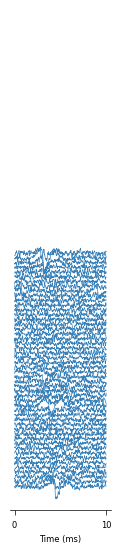

In [3]:
# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
pos_up = 0
row = 0
for contact_i in np.arange(0, N_SITES, 1):
    ax.plot(
        fig_data["trace"][:, contact_i] + pos_up,
        linewidth=LINEWIDTH,
        color=COLOR_B,
    )
    pos_up += PLOT_Y_PITCH

# legend
ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-100, Y_MAX + 100])
plt.yticks([])

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2d_spacetime_bucc_npx.svg", **savefig_cfg
    )